In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
pwd

'C:\\Users\\piichan\\Documents\\Berkeley\\CoCoSci Lab\\cogsci18\\python'

In [3]:
cd ../experiment/data/human/c1.1

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\cogsci18\experiment\data\human\c1.1


In [4]:
df=pd.read_csv('survey.csv', sep=',')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,Randomly,Randomly,left,Randomly,No,37,No,NaN
1,1,I trusted my instincts.,I always chose the lesser of two evils if all ...,the node to the left.,when i had no more turns.,"sometimes when i clicked all three nodes, only...",35,no.,"The game itself was exciting, but i don't real..."
2,2,Where there were high losses,Where there were green numbers and not red,at the branches closest to me.,when I found a way to get something positive,I would not click further in one direction if ...,45,No. It was a fun game,Thank you.
3,3,Anywhere that started out as -10 I wouldn't cl...,I decided I'd try the first circle of each pat...,The closest circle to the starting point of ea...,When I had enough information to know I would ...,Nothing else I can think of.,30,No,NaN
4,4,the negative numbers,where the spider would go first,the first spots,when i found positive numbers,NaN,52,no,NaN


In [5]:
ages = df['5']

In [6]:
np.sort(ages)

array([19, 20, 21, 21, 22, 23, 23, 23, 24, 25, 26, 27, 27, 27, 28, 28, 29,
       29, 30, 30, 30, 31, 31, 32, 32, 33, 33, 33, 33, 33, 34, 35, 35, 35,
       36, 36, 37, 38, 39, 39, 40, 41, 41, 42, 42, 44, 45, 48, 48, 49, 49,
       50, 51, 52, 52, 58, 60, 62, 63, 66], dtype=int64)

(array([ 1.,  1.,  2.,  1.,  3.,  1.,  1.,  1.,  3.,  2.,  2.,  3.,  2.,
         2.,  5.,  1.,  3.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  0.,  1.,
         1.,  0.,  0.,  2.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], dtype=int64),
 <a list of 47 Patch objects>)

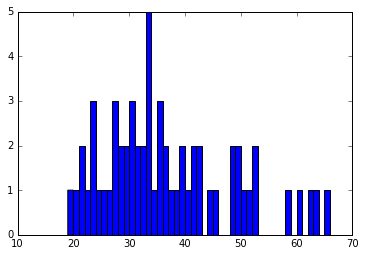

In [7]:
plt.figure()
plt.hist(ages, bins=np.arange(np.min(ages), np.max(ages)+1))

In [8]:
data = pd.read_csv('mouselab-mdp.csv')

In [9]:
df = df.rename(columns={'Unnamed: 0': 'pid'})
data = data[data['block']=='test']

In [10]:
perf = data[['pid','score', 'trial_index']]
avg_score = pd.DataFrame(perf.groupby('pid')['score'].mean())
age_score = avg_score.merge(df[['5']], how='outer', left_index=True, right_index=True)
age_score = age_score.rename(columns={'5':'age'})
#missing values taken from survey-text.csv
age_score['age'][60] = 30
age_score['age'][61] = 50
age_score = age_score.dropna(axis=0, how='any')
age_score[:10]
#age_score.corr(method='pearson')
print('Pearson: ', stats.pearsonr(age_score['age'].tolist(), age_score['score'].tolist()))
print(stats.spearmanr(age_score['age'].tolist(), age_score['score'].tolist()))

Pearson:  (0.15666594885611321, 0.22791436610796451)
SpearmanrResult(correlation=0.12305842707497824, pvalue=0.34474506380305792)


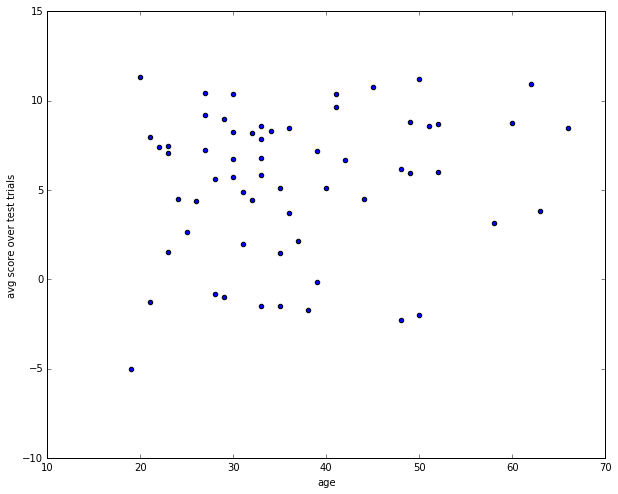

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(age_score['age'], age_score['score'])
plt.xlabel('age')
plt.ylabel("avg score over test trials")

In [12]:
first_five = perf[perf['trial_index'] < 34.0]
last_five = perf[perf['trial_index'] > 54.0]
age_score['first_five'] = first_five.groupby('pid')['score'].mean()
age_score['last_five'] = last_five.groupby('pid')['score'].mean()
age_score['improvement'] = age_score['last_five'] - age_score['first_five']
age_score

,score,age,first_five,last_five,improvement
0,2.166667,37.0,3.25,9.0,5.75
1,1.466667,35.0,-0.50,-0.6,-0.10
2,10.766667,45.0,12.25,13.8,1.55
3,6.733333,30.0,10.50,11.2,0.70
4,8.666667,52.0,12.50,7.0,-5.50
5,-0.833333,28.0,3.75,1.0,-2.75
6,9.666667,41.0,12.75,12.0,-0.75
7,-1.733333,38.0,-1.00,11.0,12.00
8,5.966667,49.0,-0.50,-1.6,-1.10
9,-1.000000,29.0,-1.25,-6.0,-4.75


Pearson:  (0.26007939767435417, 0.042945222934769225)
SpearmanrResult(correlation=0.33627061418531845, pvalue=0.0080570560072356391)


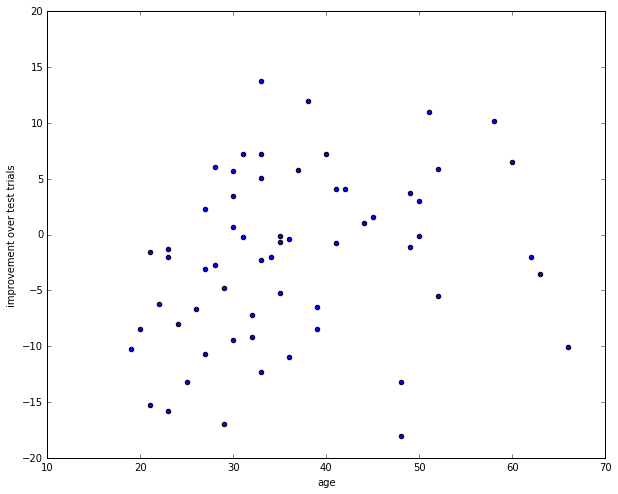

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(age_score['age'], age_score['improvement'])
plt.xlabel('age')
plt.ylabel("improvement over test trials")
print('Pearson: ', stats.pearsonr(age_score['age'].tolist(), age_score['improvement'].tolist()))
print(stats.spearmanr(age_score['age'].tolist(), age_score['improvement'].tolist()))